# 04 - Exploring Grid

In trajectories data mining process, there is a need frequent acess differents segments and  samples of trajectories. With big volume data, those acesses can need time and processing. With this, it's necessary to adopt effective techniques to management and handling of this data, allowed fast recovery of data.


One approach to this technique takes geographic space into account, dividing it into grids, the so-called **grids**, and **creating a time index for the trajectories that fall into each cell of this grid**. **Each segment** that falls into a grid **is represented by a point with coordinates equal to the start time point and the end time point of the segment**.


In PyMove, grids are delimited by coordinates in a 
cartesian plan based tracing in bound box of data. Grids are represented by objects that have those attributes:

- **lon_min_x:** minimum longitude.
- **lat_min_y:** minimum latitude. 
- **grid_size_lat_y:** grid latitude size. 
- **grid_size_lon_x:** grid longitude size.
- **cell_size_by_degree:** cell size of Grid.

## Imports


In [1]:
import pandas as pd
from pymove import MoveDataFrame
from pymove.core.grid import Grid

## Load data

In [2]:
df = pd.read_csv('geolife_sample.csv', parse_dates=['datetime'])
data = MoveDataFrame(df, latitude="lat", longitude="lon", datetime="datetime")
data = data[:1000]
data

,lat,lon,datetime,id
0,39.984094,116.319236,2008-10-23 05:53:05,1
1,39.984198,116.319322,2008-10-23 05:53:06,1
2,39.984224,116.319402,2008-10-23 05:53:11,1
3,39.984211,116.319389,2008-10-23 05:53:16,1
4,39.984217,116.319422,2008-10-23 05:53:21,1
...,...,...,...,...
995,40.013765,116.306468,2008-10-23 23:43:31,1
996,40.013828,116.306413,2008-10-23 23:43:36,1
997,40.013905,116.306365,2008-10-23 23:43:41,1
998,40.013992,116.306323,2008-10-23 23:43:46,1


## Create virtual Grid

In [3]:
grid = Grid(data, 15)


Creating a virtual grid without polygons
...cell size by degree: 0.0001353464801860623
...grid_size_lat_y:341
grid_size_lon_x:266

..A virtual grid was created


In [4]:
grid.get_grid()

{'lon_min_x': 116.305468,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.0001353464801860623}

## Create one polygon to point on grid

In [5]:
print(grid.create_one_polygon_to_point_on_grid(2, 1))

POLYGON ((116.3056033464802 39.97078169296037, 116.3056033464802 39.97091703944056, 116.3057386929604 39.97091703944056, 116.3057386929604 39.97078169296037, 116.3056033464802 39.97078169296037))


## Create or update index grid feature

In [6]:
grid.create_update_index_grid_feature(data)


Creating or updating index of the grid feature..

...[1000,1000] indexes were created to lat and lon


In [7]:
data.head()

,lat,lon,datetime,id,index_grid
0,39.984094,116.319236,2008-10-23 05:53:05,1,34541
1,39.984198,116.319322,2008-10-23 05:53:06,1,34883
2,39.984224,116.319402,2008-10-23 05:53:11,1,34883
3,39.984211,116.319389,2008-10-23 05:53:16,1,34883
4,39.984217,116.319422,2008-10-23 05:53:21,1,35224


## Create all polygons to all point on grid

In [8]:
grid_data = grid.create_all_polygons_to_all_point_on_grid(data)


Creating or updating index of the grid feature..

...[1000,1000] indexes were created to lat and lon
...polygons were created


In [9]:
grid_data.head()

,id,index_grid_lat,index_grid_lon,polygon
0,1,100,101,"POLYGON ((116.3191379944988 39.98404564801861,..."
1,1,101,102,"POLYGON ((116.319273340979 39.98418099449879, ..."
4,1,101,103,"POLYGON ((116.3194086874592 39.98418099449879,..."
5,1,104,106,"POLYGON ((116.3198147268997 39.98458703393936,..."
6,1,104,105,"POLYGON ((116.3196793804195 39.98458703393936,..."


## Create all polygons on grid

In [10]:
grid.create_all_polygons_on_grid()


Creating all polygons on virtual grid


...geometries saved on Grid grid_polygon property


In [11]:
(grid.grid_polygon).shape

(341, 266)

## Get point to index grid

In [12]:
grid.point_to_index_grid(39.984094, 116.319236)

...[1,1] indexes were created to lat and lon


(100.0, 101.0)

## Save grid to .pkl

In [13]:
grid.save_grid_pkl('teste.pkl')

## Read .pkl to grid

In [14]:
grid.read_grid_pkl('teste.pkl').get_grid()

{'lon_min_x': 116.305468,
 'lat_min_y': 39.970511,
 'grid_size_lat_y': 341,
 'grid_size_lon_x': 266,
 'cell_size_by_degree': 0.0001353464801860623}

## Show a grid polygons

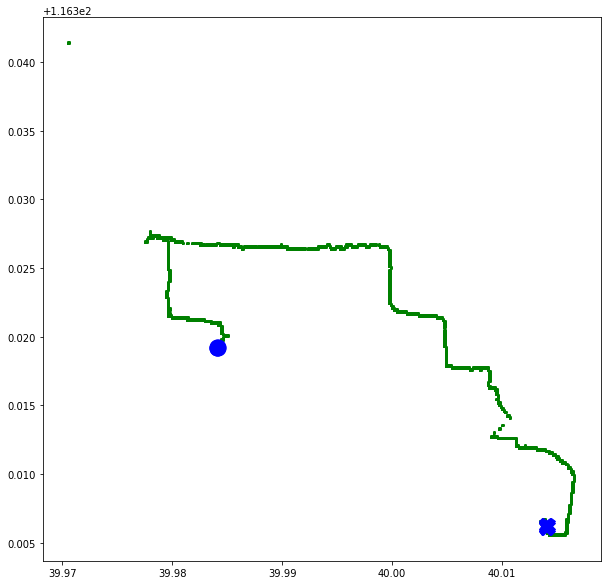

In [15]:
grid.show_grid_polygons(grid_data, return_fig=False)